In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras as kr
import pickle

### 43 different classes of images
- ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
- ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
- ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
- ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
- ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
- (10, b'No passing for vehicles over 3.5 metric tons')
- (11, b'Right-of-way at the next intersection') (12, b'Priority road')
- (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
- (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
- (18, b'General caution') (19, b'Dangerous curve to the left')
- (20, b'Dangerous curve to the right') (21, b'Double curve')
- (22, b'Bumpy road') (23, b'Slippery road')
- (24, b'Road narrows on the right') (25, b'Road work')
- (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
- (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
- (31, b'Wild animals crossing')
- (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
- (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
- (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
- (40, b'Roundabout mandatory') (41, b'End of no passing')
- (42, b'End of no passing by vehicles over 3.5 metric tons')

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as train:
    train_dataset = pickle.load(train)
with open("./traffic-signs-data/test.p", mode='rb') as test:
    test_dataset = pickle.load(test)
with open("./traffic-signs-data/valid.p", mode='rb') as valid:
    validation_dataset = pickle.load(valid)

In [3]:
X_train, y_train = train_dataset['features'], train_dataset['labels']
X_test, y_test = test_dataset['features'], test_dataset['labels']
X_valid, y_valid = validation_dataset['features'], validation_dataset['labels']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_valid.shape, y_valid.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)
(4410, 32, 32, 3) (4410,)


In [4]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [5]:
# Turning all pictures from RGB to gray(black and white) pictures
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)
X_valid = np.sum(X_valid/3, axis=3, keepdims=True)

In [6]:
# Normalizing the values
X_train = (X_train-128)/128
X_test = (X_test-128)/128
X_valid = (X_valid-128)/128

In [7]:
cnn = kr.models.Sequential()

cnn.add(kr.layers.Conv2D(filters=6, kernel_size=(5,5), activation="relu", input_shape=(32,32,1)))
cnn.add(kr.layers.MaxPooling2D(pool_size=2, strides=2))
cnn.add(kr.layers.Dropout(0.2))

cnn.add(kr.layers.Conv2D(filters=16, kernel_size=(5,5), activation="relu"))
cnn.add(kr.layers.MaxPooling2D(pool_size=2, strides=2))
cnn.add(kr.layers.Dropout(0.3))

cnn.add(kr.layers.Flatten())

cnn.add(kr.layers.Dense(units=512, activation="relu"))
cnn.add(kr.layers.Dense(units=1024, activation="relu"))
cnn.add(kr.layers.Dense(units=512, activation="relu"))
cnn.add(kr.layers.Dense(units=43, activation="softmax"))

In [8]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=kr.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [9]:
history = cnn.fit(X_train, y_train, batch_size=250, epochs=250, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/250
140/140 [==============================] - 9s 62ms/step - loss: 2.1477 - accuracy: 0.4061 - val_loss: 1.0502 - val_accuracy: 0.6873
Epoch 2/250
140/140 [==============================] - 8s 60ms/step - loss: 0.7855 - accuracy: 0.7649 - val_loss: 0.5537 - val_accuracy: 0.8209
Epoch 3/250
140/140 [==============================] - 8s 59ms/step - loss: 0.4866 - accuracy: 0.8519 - val_loss: 0.4018 - val_accuracy: 0.8880
Epoch 4/250
140/140 [==============================] - 8s 60ms/step - loss: 0.3533 - accuracy: 0.8910 - val_loss: 0.3375 - val_accuracy: 0.9002
Epoch 5/250
140/140 [==============================] - 8s 60ms/step - loss: 0.2840 - accuracy: 0.9103 - val_loss: 0.3126 - val_accuracy: 0.9098
Epoch 6/250
140/140 [==============================] - 8s 60ms/step - loss: 0.2331 - accuracy: 0.9283 - val_loss: 0.2801 - val_accuracy: 0.9161
Epoch 7/250
140/140 [==============================] - 9s 62ms/step - loss: 0.1987 - accuracy: 0.9367 - val_loss: 0.2835 - val_accuracy:

140/140 [==============================] - 9s 65ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.3740 - val_accuracy: 0.9283
Epoch 58/250
140/140 [==============================] - 9s 65ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.3360 - val_accuracy: 0.9370
Epoch 59/250
140/140 [==============================] - 9s 66ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.4029 - val_accuracy: 0.9306
Epoch 60/250
140/140 [==============================] - 9s 64ms/step - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.3838 - val_accuracy: 0.9333
Epoch 61/250
140/140 [==============================] - 9s 65ms/step - loss: 0.0341 - accuracy: 0.9886 - val_loss: 0.3894 - val_accuracy: 0.9454
Epoch 62/250
140/140 [==============================] - 9s 65ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.3842 - val_accuracy: 0.9383
Epoch 63/250
140/140 [==============================] - 9s 66ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.3354 - val_accuracy: 0.943

140/140 [==============================] - 9s 65ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.5061 - val_accuracy: 0.9231
Epoch 114/250
140/140 [==============================] - 9s 65ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.5493 - val_accuracy: 0.9322
Epoch 115/250
140/140 [==============================] - 9s 65ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.4116 - val_accuracy: 0.9313
Epoch 116/250
140/140 [==============================] - 9s 67ms/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.3857 - val_accuracy: 0.9433
Epoch 117/250
140/140 [==============================] - 9s 68ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.3986 - val_accuracy: 0.9324
Epoch 118/250
140/140 [==============================] - 9s 64ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.4383 - val_accuracy: 0.9277
Epoch 119/250
140/140 [==============================] - 9s 65ms/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.4211 - val_accuracy:

140/140 [==============================] - 9s 65ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.3266 - val_accuracy: 0.9442
Epoch 170/250
140/140 [==============================] - 9s 65ms/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.3040 - val_accuracy: 0.9424
Epoch 171/250
140/140 [==============================] - 9s 66ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.3922 - val_accuracy: 0.9415
Epoch 172/250
140/140 [==============================] - 9s 64ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.4549 - val_accuracy: 0.9354
Epoch 173/250
140/140 [==============================] - 9s 65ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.4075 - val_accuracy: 0.9397
Epoch 174/250
140/140 [==============================] - 9s 66ms/step - loss: 0.0202 - accuracy: 0.9944 - val_loss: 0.4293 - val_accuracy: 0.9288
Epoch 175/250
140/140 [==============================] - 9s 67ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.3921 - val_accuracy:

140/140 [==============================] - 9s 67ms/step - loss: 0.0134 - accuracy: 0.9961 - val_loss: 0.4910 - val_accuracy: 0.9376
Epoch 226/250
140/140 [==============================] - 9s 67ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.5464 - val_accuracy: 0.9356
Epoch 227/250
140/140 [==============================] - 9s 66ms/step - loss: 0.0167 - accuracy: 0.9951 - val_loss: 0.5636 - val_accuracy: 0.9345
Epoch 228/250
140/140 [==============================] - 9s 66ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.4942 - val_accuracy: 0.9395
Epoch 229/250
140/140 [==============================] - 9s 65ms/step - loss: 0.0160 - accuracy: 0.9955 - val_loss: 0.4827 - val_accuracy: 0.9317
Epoch 230/250
140/140 [==============================] - 9s 66ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.4462 - val_accuracy: 0.9340
Epoch 231/250
140/140 [==============================] - 9s 66ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.4618 - val_accuracy:

In [10]:
score = cnn.evaluate(X_test, y_test)
print(f"Score: {score[0]}, Accuracy: {score[1]}")

395/395 [==============================] - 5s 12ms/step - loss: 0.4662 - accuracy: 0.9361
Score: 0.466215044260025, Accuracy: 0.9361045360565186


In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

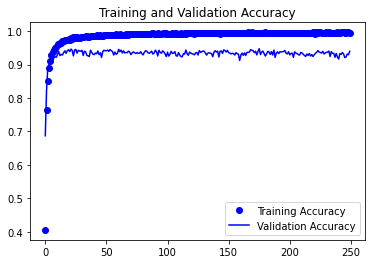

In [13]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

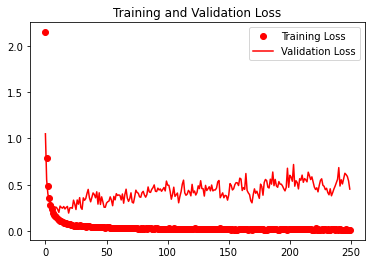

In [14]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
y_pred = cnn.predict(X_test) 
y_pred_classes = np.argmax(y_pred,axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[ 55,   4,   0, ...,   0,   0,   0],
       [  0, 706,   5, ...,   1,   0,   0],
       [  0,   9, 727, ...,   0,   0,   0],
       ...,
       [  0,   3,   0, ...,  75,   0,   1],
       [  0,   0,   0, ...,   0,  48,   0],
       [  0,   0,   0, ...,   0,   1,  81]], dtype=int64)

<AxesSubplot:>

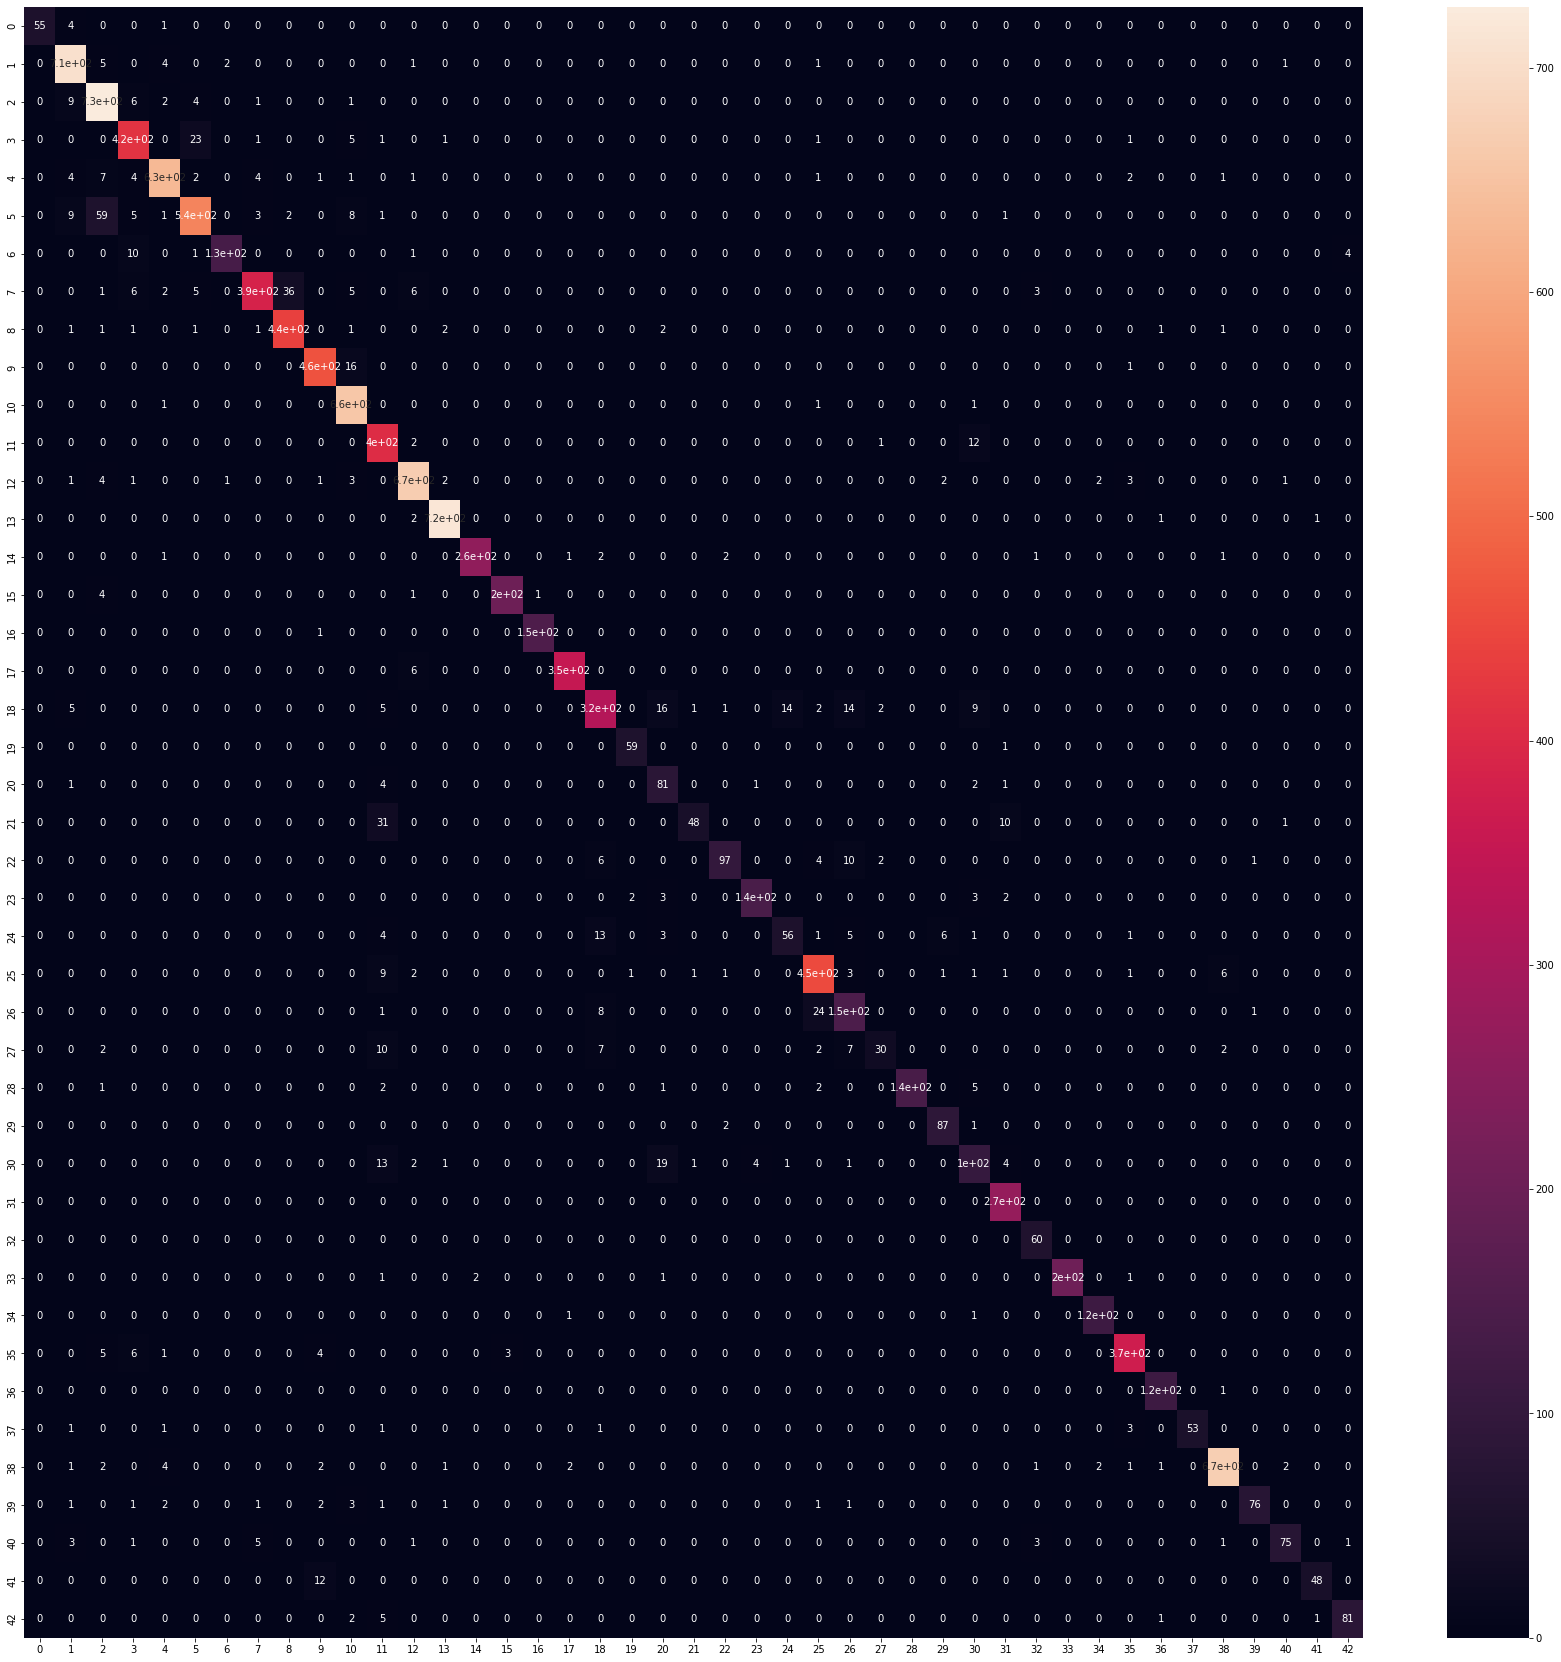

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True)

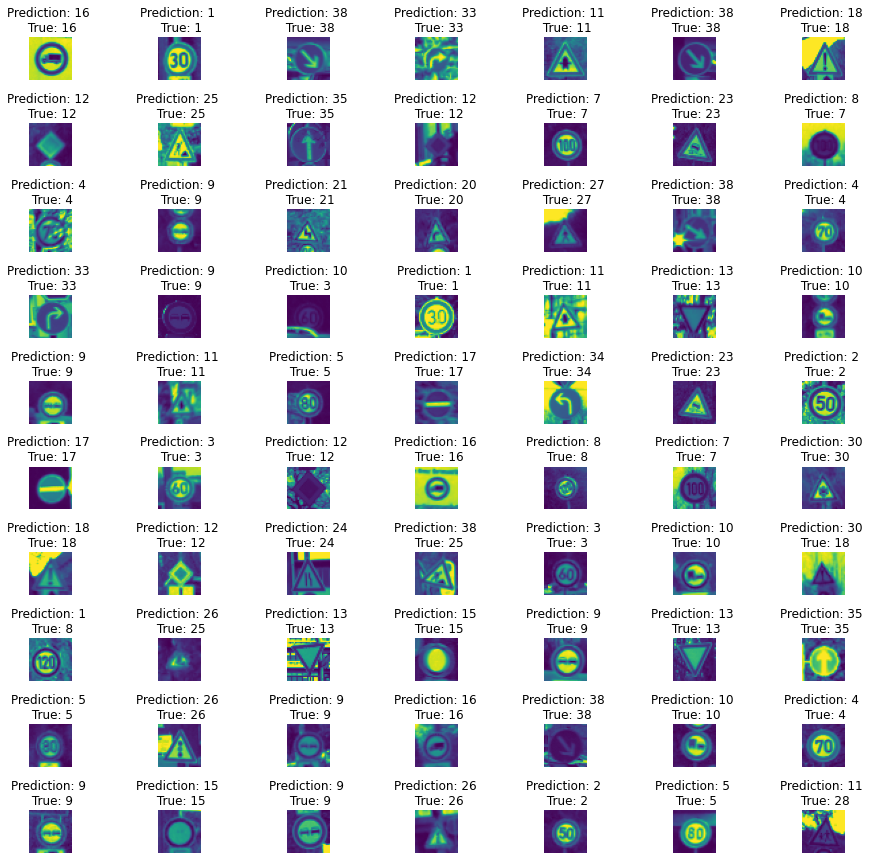

In [18]:
L = 10
W = 7
fig, axes = plt.subplots(L,W,figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Prediction: {y_pred_classes[i]} \n True: {y_test[i]}")
    axes[i].axis('off')
plt.subplots_adjust(hspace=1, wspace=1)